<a href="https://colab.research.google.com/github/anishareddy04/ML_CSE_21206A/blob/ML_LAB_CODES/Lab_9_10_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test_data.xlsx to test_data.xlsx
Saving train_data.xlsx to train_data.xlsx


In [22]:
excel = pd.ExcelFile('train_data.xlsx')
data = pd.read_excel(excel, 'Sheet1')

data

,Unnamed: 0,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,-0.031154,0.005788,0.013190,0.032214,-0.002240,-0.007682,-0.042094,0.069687,0.041463,...,-0.052788,0.025505,-0.031762,-0.028066,-0.015836,0.020776,0.019726,-0.000173,-0.037625,-0.029255
1,1,-0.059829,-0.029655,0.023997,0.029381,-0.008910,0.002651,-0.021002,0.062534,0.041522,...,-0.024644,-0.002297,-0.039347,-0.055724,0.030523,0.044003,0.000522,-0.015451,-0.015479,-0.025860
2,2,-0.051916,0.002292,0.037476,0.018359,-0.009908,0.007921,-0.056453,0.073637,-0.002247,...,-0.015411,0.034888,-0.027017,-0.026406,-0.003014,0.036860,0.031879,-0.033040,-0.041552,0.003078
3,3,-0.065384,-0.042939,0.011656,0.032460,-0.013346,0.003960,-0.037575,0.053072,0.037404,...,-0.018055,-0.021441,-0.034868,-0.050517,0.026233,0.061242,0.004917,-0.020379,-0.039484,-0.018563
4,4,-0.060732,-0.030397,0.010289,0.024453,-0.004234,-0.000490,-0.037785,0.077979,-0.000518,...,-0.007468,0.018795,-0.028469,-0.058496,0.014169,0.047644,0.019805,-0.004765,-0.030699,0.001279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1122,-0.026631,-0.024138,0.022152,0.030705,-0.010941,0.010412,-0.068544,0.040590,0.020089,...,-0.041870,0.005108,-0.030552,-0.031571,0.000763,0.041070,0.018058,0.011748,-0.019817,-0.051990
1123,1123,-0.027868,-0.025621,0.021914,0.026630,-0.010832,0.006786,-0.064095,0.041112,0.022489,...,-0.044721,0.003304,-0.034322,-0.033685,0.000810,0.036538,0.018109,0.015402,-0.022393,-0.051995
1124,1124,-0.022655,-0.022344,0.028929,0.031298,-0.000826,0.014729,-0.062079,0.036594,0.022011,...,-0.038476,0.000219,-0.026677,-0.037036,-0.005554,0.044752,0.019307,0.008449,-0.014606,-0.051293
1125,1125,-0.019132,-0.029746,0.020091,0.027317,-0.008917,0.006835,-0.068679,0.038859,0.021410,...,-0.042361,-0.002104,-0.043841,-0.035514,-0.003528,0.030043,0.015535,0.023486,-0.018750,-0.058408


In [8]:
excel = pd.ExcelFile('test_data.xlsx')
data2 = pd.read_excel(excel, 'Sheet1')
data2

,Unnamed: 0,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,0,-0.031154,0.005788,0.013190,0.032214,-0.002240,-0.007682,-0.042094,0.069687,0.041463,...,-0.052788,0.025505,-0.031762,-0.028066,-0.015836,0.020776,0.019726,-0.000173,-0.037625,-0.029255
1,1,-0.008623,-0.022160,0.038645,0.047361,-0.010748,0.016291,-0.060594,0.048401,0.036513,...,-0.043556,0.007431,-0.034695,-0.027479,0.033009,0.037142,0.025277,0.016249,0.002649,-0.031123
2,2,-0.042335,-0.006139,0.055676,0.042178,-0.017414,0.001958,-0.042683,0.059744,0.041863,...,-0.020286,0.016767,-0.021796,-0.012950,0.021232,0.056906,0.013292,0.010692,-0.011486,-0.041746
3,3,-0.038854,-0.012770,0.058698,0.028715,-0.006059,0.001011,-0.052153,0.065605,0.042066,...,-0.026670,0.006840,-0.018257,-0.008433,0.023228,0.050323,0.013361,0.012650,-0.010507,-0.045085
4,4,-0.021714,0.039733,0.022342,0.029314,-0.011418,0.020631,-0.060220,0.054664,-0.008685,...,-0.010489,0.033803,-0.041700,-0.052010,0.021892,0.043762,0.015838,-0.000047,-0.029743,0.002595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65,0.010180,-0.011995,0.032084,0.041886,-0.012140,0.014416,-0.044140,0.034116,0.021652,...,-0.052447,-0.018572,-0.042337,-0.059384,0.022794,0.033899,0.016523,0.040451,0.012613,-0.015420
66,66,-0.046584,-0.038691,0.013749,0.039740,-0.041682,-0.012247,-0.048304,0.066465,0.046029,...,-0.031630,0.026734,-0.030189,-0.027857,0.011235,0.020077,0.007115,-0.024253,-0.020113,-0.014307
67,67,-0.021693,-0.049638,0.024616,0.055341,-0.032129,0.010809,-0.053091,0.063552,0.045462,...,-0.032673,0.019050,-0.024908,-0.025322,0.011040,0.019500,0.016204,0.000729,-0.008100,-0.008974
68,68,-0.046183,-0.041136,0.026308,0.003228,-0.041647,-0.001144,-0.055983,0.050641,0.026329,...,-0.019076,-0.004715,-0.024494,-0.047781,0.011340,0.021869,0.010375,-0.016963,-0.024342,-0.001429


In [23]:
merged_data = pd.concat([data, data2], axis=0)

# Remove class labels
t5_features = merged_data.drop('embed_9', axis=1)

# Standardize or normalize features
scaler = StandardScaler()
t5_features_scaled = scaler.fit_transform(t5_features)

# Standardize or normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)



A1.Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

In [9]:
#A1
merged_data = pd.concat([data, data2], axis=0)
features = merged_data.drop('embed_9', axis=1)

k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features)


scaler = StandardScaler()
t5_features_scaled = scaler.fit_transform(features)


merged_data['cluster'] = clusters
print(merged_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Unnamed: 0   embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
0            0 -0.031154  0.005788  0.013190  0.032214 -0.002240 -0.007682   
1            1 -0.059829 -0.029655  0.023997  0.029381 -0.008910  0.002651   
2            2 -0.051916  0.002292  0.037476  0.018359 -0.009908  0.007921   
3            3 -0.065384 -0.042939  0.011656  0.032460 -0.013346  0.003960   
4            4 -0.060732 -0.030397  0.010289  0.024453 -0.004234 -0.000490   
..         ...       ...       ...       ...       ...       ...       ...   
65          65  0.010180 -0.011995  0.032084  0.041886 -0.012140  0.014416   
66          66 -0.046584 -0.038691  0.013749  0.039740 -0.041682 -0.012247   
67          67 -0.021693 -0.049638  0.024616  0.055341 -0.032129  0.010809   
68          68 -0.046183 -0.041136  0.026308  0.003228 -0.041647 -0.001144   
69          69 -0.050950 -0.038060  0.031824  0.000333 -0.044964  0.007230   

     embed_6   embed_7   embed_8  ...  embed_759  embed_760  em

A2. Determine the ideal k value for your dataset. Determine the clusters for a range of k ε[1,31]. Use elbow method to determine the ideal value of k based on average Euclidean distance from cluster center.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

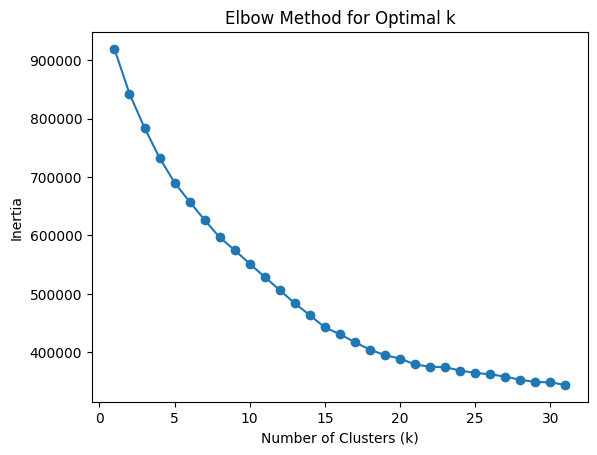

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Unnamed: 0   embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
0            0 -0.031154  0.005788  0.013190  0.032214 -0.002240 -0.007682   
1            1 -0.059829 -0.029655  0.023997  0.029381 -0.008910  0.002651   
2            2 -0.051916  0.002292  0.037476  0.018359 -0.009908  0.007921   
3            3 -0.065384 -0.042939  0.011656  0.032460 -0.013346  0.003960   
4            4 -0.060732 -0.030397  0.010289  0.024453 -0.004234 -0.000490   
..         ...       ...       ...       ...       ...       ...       ...   
65          65  0.010180 -0.011995  0.032084  0.041886 -0.012140  0.014416   
66          66 -0.046584 -0.038691  0.013749  0.039740 -0.041682 -0.012247   
67          67 -0.021693 -0.049638  0.024616  0.055341 -0.032129  0.010809   
68          68 -0.046183 -0.041136  0.026308  0.003228 -0.041647 -0.001144   
69          69 -0.050950 -0.038060  0.031824  0.000333 -0.044964  0.007230   

     embed_6   embed_7   embed_8  ...  embed_759  embed_760  em

In [10]:
#A2
merged_data = pd.concat([data, data2], axis=0)

features = merged_data.drop('embed_9', axis=1)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertias = []
k_values = range(1, 32)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(t5_features_scaled)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

ideal_k = 5
kmeans_t5 = KMeans(n_clusters=ideal_k, random_state=42)
clusters_t5 = kmeans_t5.fit_predict(t5_features_scaled)

merged_data['cluster'] = clusters_t5
print(merged_data)


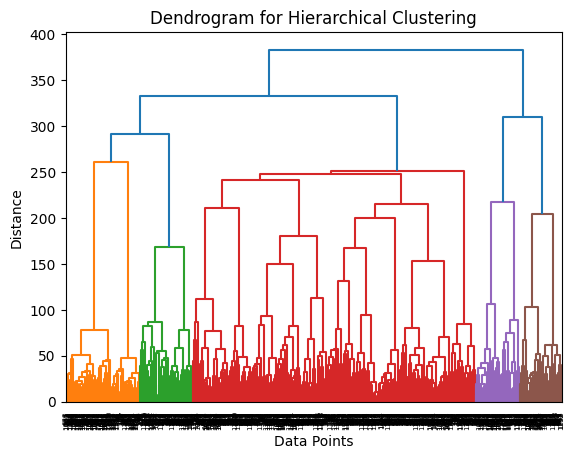

    Unnamed: 0   embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
0            0 -0.031154  0.005788  0.013190  0.032214 -0.002240 -0.007682   
1            1 -0.059829 -0.029655  0.023997  0.029381 -0.008910  0.002651   
2            2 -0.051916  0.002292  0.037476  0.018359 -0.009908  0.007921   
3            3 -0.065384 -0.042939  0.011656  0.032460 -0.013346  0.003960   
4            4 -0.060732 -0.030397  0.010289  0.024453 -0.004234 -0.000490   
..         ...       ...       ...       ...       ...       ...       ...   
65          65  0.010180 -0.011995  0.032084  0.041886 -0.012140  0.014416   
66          66 -0.046584 -0.038691  0.013749  0.039740 -0.041682 -0.012247   
67          67 -0.021693 -0.049638  0.024616  0.055341 -0.032129  0.010809   
68          68 -0.046183 -0.041136  0.026308  0.003228 -0.041647 -0.001144   
69          69 -0.050950 -0.038060  0.031824  0.000333 -0.044964  0.007230   

     embed_6   embed_7   embed_8  ...  embed_759  embed_760  em

In [26]:
#A3

merged_data = pd.concat([data, data2], axis=0)
# Remove class labels
features = merged_data.drop('embed_9', axis=1)

n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
clusters_t5_agg = agg_clustering.fit_predict(t5_features_scaled)

merged_data['cluster_agg'] = clusters_t5_agg

# Plot the dendrogram
linked = linkage(features_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display the clustered dataset
print(merged_data)


In [20]:

# Separating features and target

X = data.drop(columns=['embed_9'])  # Features
y = data['embed_9']  # Target

# Selecting only numeric columns for feature selection
numeric_columns = X.select_dtypes(include=['number']).columns.tolist()
X_numeric = X[numeric_columns]

# Scaling numeric data for feature selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Sequential Feature Selector
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=1)
selector.fit(X_scaled, y)

# Getting selected features
selected_features = X_numeric.columns[selector.support_]


In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

num_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print("Explained Variance along Principal Components:")
print(cumulative_variance_ratio)

print("\nNumber of features needed to capture 95% of the variance:", num_components_95)


Explained Variance along Principal Components:
[0.10589302 0.18720803 0.26047838 0.32559602 0.37866388 0.42544537
 0.46594447 0.50263292 0.53461279 0.56506474 0.59328102 0.61663724
 0.63878481 0.65778565 0.67657334 0.6935178  0.70705886 0.71992847
 0.73212144 0.74299422 0.75230956 0.76146687 0.76943397 0.77686925
 0.7840018  0.79069726 0.79723437 0.80292189 0.80850509 0.81375382
 0.81869889 0.82350211 0.82807898 0.83263378 0.83687354 0.84095006
 0.84500887 0.84889638 0.85259777 0.85598136 0.85927689 0.86248926
 0.86558413 0.86861597 0.87150031 0.87434169 0.8771039  0.87966539
 0.88209134 0.88444691 0.88676227 0.88894785 0.89111253 0.89321823
 0.89525692 0.89722279 0.89911847 0.90099186 0.90280264 0.90456175
 0.90625708 0.90791276 0.90955574 0.91116222 0.91271609 0.91426091
 0.91576933 0.91723155 0.91866739 0.92005216 0.92140044 0.92272894
 0.9240165  0.92525941 0.92648468 0.92766849 0.92885033 0.92999829
 0.93109835 0.93218254 0.93325276 0.93431346 0.93532386 0.93633192
 0.9373265  0.9